# Data fetching from V1DD physiology data set
## -- the `v1dd_physiology.data_fetching` module

In [1]:
import h5py
import v1dd_physiology.data_fetching as daf
import matplotlib.pyplot as plt

### The data set is saved on a network share. The description of the content can be found [here](https://github.com/AllenInstitute/v1dd_physiology/blob/main/v1dd_physiology/meta/database_description.md).

In [2]:
# windows
base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"

### List all the imaging sessions in the data set
Imaging session name is organized as 10-character string with structure `M{mouse\_id}\_{column_id}{volumn_id}`. For example: `M409828_11`.
There are 5 columns (1 through 5), and for each column, multiple volumes were imaged at different cortical depth. Volume 1 - 5 were two-photon ("DeepScope") sessions with simulantously imaged 6 imaging planes (16 um apart from each other). So each two-photon volume expands 16 * 6 = 96 um in cortical depth. Volume 6 - f were three-photon single plane sessions in deeper depth. Adjacent three-photon planes were 25 microns apart. Only the central column has three-photon sessions. 

In [3]:
daf.get_all_sessions(database_path=base_folder)

['M409828_11',
 'M409828_12',
 'M409828_13',
 'M409828_14',
 'M409828_15',
 'M409828_16',
 'M409828_17',
 'M409828_18',
 'M409828_19',
 'M409828_1a',
 'M409828_1b',
 'M409828_1c',
 'M409828_1d',
 'M409828_1e',
 'M409828_1f',
 'M409828_21',
 'M409828_22',
 'M409828_23',
 'M409828_24',
 'M409828_25',
 'M409828_31',
 'M409828_32',
 'M409828_33',
 'M409828_34',
 'M409828_35',
 'M409828_41',
 'M409828_42',
 'M409828_43',
 'M409828_44',
 'M409828_45',
 'M409828_51',
 'M409828_52',
 'M409828_53',
 'M409828_54',
 'M409828_55',
 'M416296_11',
 'M416296_12',
 'M416296_13',
 'M416296_14',
 'M416296_15',
 'M416296_17',
 'M416296_18',
 'M416296_19',
 'M416296_1a',
 'M416296_1b',
 'M416296_1c',
 'M416296_21',
 'M416296_22',
 'M416296_23',
 'M416296_24',
 'M416296_25',
 'M416296_31',
 'M416296_32',
 'M416296_33',
 'M416296_34',
 'M416296_35',
 'M416296_41',
 'M416296_42',
 'M416296_43',
 'M416296_44',
 'M416296_45',
 'M416296_51',
 'M416296_52',
 'M416296_53',
 'M416296_54',
 'M416296_55',
 'M427836_

### Select one session

In [4]:
mouse_id = '409828'
col_id = '1'
vol_id = '3'

In [5]:
sess_id = f'M{mouse_id}_{col_id}{vol_id}'
sess_id

'M409828_13'

### Find the path to the nwb file for the given session
The data from each imaging session is saved in a single nwb file. Givn the base path to the data set and the session name (the 10-character string). It is easy to find the path to the corresponding nwb file.

In [6]:
nwb_path = daf.get_nwb_path(session_id=sess_id, database_path=base_folder)
nwb_path

'\\\\allen\\programs\\mindscope\\workgroups\\surround\\v1dd_in_vivo_new_segmentation\\data\\nwbs\\M409828_13_20181213.nwb'

### Open the nwb file as an hdf5 file and create a file object. 
<span style="color:red">Make sure open it in the **"read-only"** mode.</span>

In [7]:
nwb_f = h5py.File(nwb_path, 'r')

### From the file object get the session id

In [8]:
sess_id = daf.get_session_id(nwb_f=nwb_f)
sess_id

'M409828_13'

### From the file object get the LIMS session id 

In [9]:
daf.get_lims_session_id(nwb_f=nwb_f)

'794964451'

### From the file object get the scope type
 * '2p' : two-photon session
 * '3p' : three-photon session

In [10]:
daf.get_scope_type(nwb_f=nwb_f)

'2p'

### From the file object get the surface vasculature map
 * type='wf' : widefield map
 * type='mp' : multi-photon map
 * is_standard=False : original orientation
 * is_standard=True : standard orientation that matches the ISI map

Text(0.5, 1.0, 'multi-photon map')

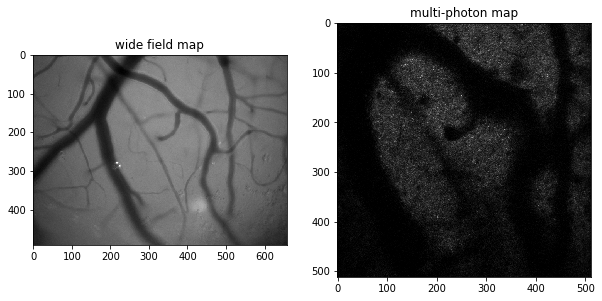

In [11]:
vasmap_wf = daf.get_vasculature_map(nwb_f=nwb_f, type='wf', is_standard=False)
vasmap_mp = daf.get_vasculature_map(nwb_f=nwb_f, type='mp', is_standard=False)

f, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map')

Text(0.5, 1.0, 'multi-photon map, standard orientation')

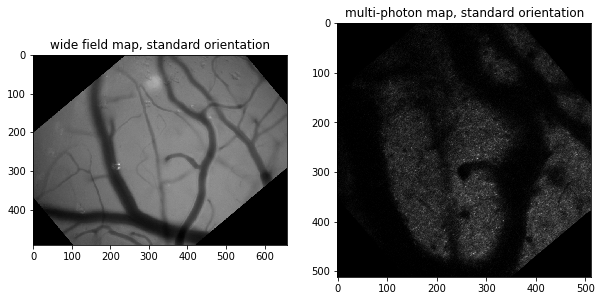

In [12]:
vasmap_wf = daf.get_vasculature_map(nwb_f=nwb_f, type='wf', is_standard=True)
vasmap_mp = daf.get_vasculature_map(nwb_f=nwb_f, type='mp', is_standard=True)

f, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].imshow(vasmap_wf, cmap='gray', interpolation='nearest')
axs[0].set_title('wide field map, standard orientation')
axs[1].imshow(vasmap_mp, cmap='gray', interpolation='nearest')
axs[1].set_title('multi-photon map, standard orientation')

### From the file object, get a list of imaging plane names
The name of each imaging plane is a 6-character string, e.g. 'plane0'. Each two-photon session has 6 planes, 'plane0' to 'plane5' with increasing cortical depth. Each three-photon session has only one plane, 'plane0'.

In [13]:
plane_ns = daf.get_plane_names(nwb_f=nwb_f)
plane_ns

['plane0', 'plane1', 'plane2', 'plane3', 'plane4', 'plane5']

### From the file object and the plane name, get the imaging depth in microns

In [14]:
for plane_n in plane_ns:
    depth = daf.get_plane_depth(nwb_f=nwb_f, plane_n=plane_n)
    print(f'depth of {plane_n}: {depth} um')

depth of plane0: 242 um
depth of plane1: 258 um
depth of plane2: 274 um
depth of plane3: 290 um
depth of plane4: 306 um
depth of plane5: 322 um


### Select one imaging plane

In [15]:
plane_n = 'plane0'

### From the file object and the plane name, give the LIMS experiment id.
LIMS assign an unique experiment id (9-character string) to every single imaging plane. This id is very important to locate the raw data in LIMS. 

In [16]:
exp_id = daf.get_lims_experiment_id(nwb_f=nwb_f, plane_n=plane_n)
exp_id

'795018590'

### From the file object and the plane name, get the mean, max, and correlation projections of this imaging plane
For roi segmentation the raw multi-photon movie was motion corrected and then denoised using [DeepInterpolation](https://github.com/AllenInstitute/deepinterpolation). The projections stored in the nwb files are fromthe motion-corrected raw movies and motion-corrected denoised movies.

 * proj_raw_mean : mean projection of the raw movie
 * proj_raw_max : max projection of the raw movie
 * proj_de_mean : mean projection of denoised movie
 * proj_de_max : max projection of denoised movie
 * proj_de_corr : correlation projection of denoised movie

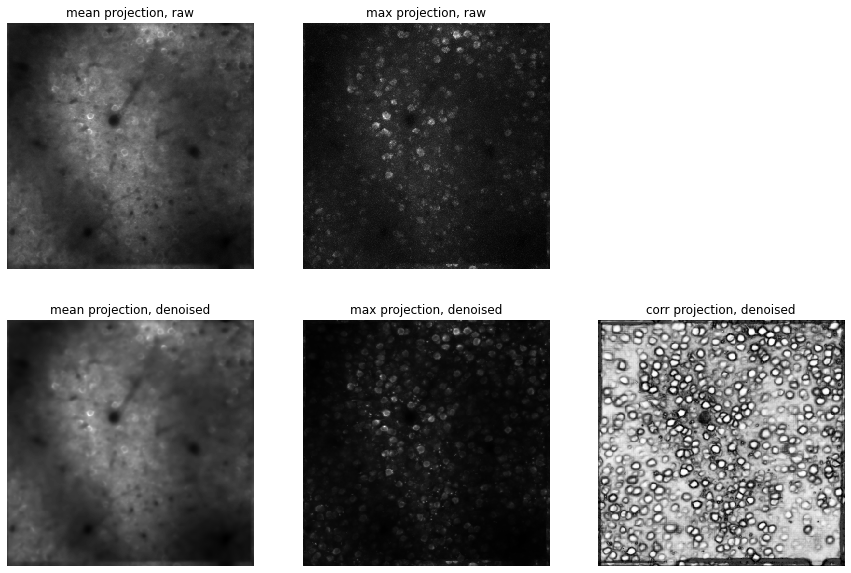

In [17]:
proj_raw_mean, proj_raw_max, proj_de_mean, proj_de_max, proj_de_corr = \
daf.get_plane_projections(nwb_f=nwb_f, plane_n=plane_n)

f, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
axs[0, 0].imshow(proj_raw_mean, cmap='gray', interpolation='nearest')
axs[0, 0].set_title('mean projection, raw')
axs[0, 1].imshow(proj_raw_max, cmap='gray', interpolation='nearest')
axs[0, 1].set_title('max projection, raw')
axs[1, 0].imshow(proj_de_mean, cmap='gray', interpolation='nearest')
axs[1, 0].set_title('mean projection, denoised')
axs[1, 1].imshow(proj_de_max, cmap='gray', interpolation='nearest')
axs[1, 1].set_title('max projection, denoised')
axs[1, 2].imshow(proj_de_corr, cmap='gray', interpolation='nearest')
axs[1, 2].set_title('corr projection, denoised')

for ax in axs.flat:
    ax.set_axis_off()

### From the file object and the plane name, list all the roi names in this imaging plane

The roi names are 8-character strings with format 'roi_{roi_index}', e.g. 'roi_0000'. So the session_name + plane_name + roi_name defines an unique roi.  
Please note that the roi index is continuous, which can be used as index to retrive calcium traces from traces matrix (see below).

In [18]:
roi_ns = daf.get_roi_ns(nwb_f=nwb_f, plane_n=plane_n)
print(f'there are {len(roi_ns)} in {plane_n} of session: {sess_id}:')
print('\nnames of first 100 rois:\n')
print(roi_ns[0:100])

there are 1234 in plane0 of session: M409828_13:

names of first 100 rois:

['roi_0000', 'roi_0001', 'roi_0002', 'roi_0003', 'roi_0004', 'roi_0005', 'roi_0006', 'roi_0007', 'roi_0008', 'roi_0009', 'roi_0010', 'roi_0011', 'roi_0012', 'roi_0013', 'roi_0014', 'roi_0015', 'roi_0016', 'roi_0017', 'roi_0018', 'roi_0019', 'roi_0020', 'roi_0021', 'roi_0022', 'roi_0023', 'roi_0024', 'roi_0025', 'roi_0026', 'roi_0027', 'roi_0028', 'roi_0029', 'roi_0030', 'roi_0031', 'roi_0032', 'roi_0033', 'roi_0034', 'roi_0035', 'roi_0036', 'roi_0037', 'roi_0038', 'roi_0039', 'roi_0040', 'roi_0041', 'roi_0042', 'roi_0043', 'roi_0044', 'roi_0045', 'roi_0046', 'roi_0047', 'roi_0048', 'roi_0049', 'roi_0050', 'roi_0051', 'roi_0052', 'roi_0053', 'roi_0054', 'roi_0055', 'roi_0056', 'roi_0057', 'roi_0058', 'roi_0059', 'roi_0060', 'roi_0061', 'roi_0062', 'roi_0063', 'roi_0064', 'roi_0065', 'roi_0066', 'roi_0067', 'roi_0068', 'roi_0069', 'roi_0070', 'roi_0071', 'roi_0072', 'roi_0073', 'roi_0074', 'roi_0075', 'roi_0076',

### From the file object and the plane name, list all the pika roi ids in this imaging plane
As stated above each imaging plane has an unique LIMS experiment id, using this ID team PIKA generated another system for identifying rois with the format of '{lims_exp_id}\_{roi_ind}' (14-character string), e.g. '795018590_0002'.  
&nbsp;  
These ids is useful to match rois with LIMS and PIKA processing output.  
&nbsp;  
<span style="color:red">**Please note: the roi_ind in this system is not continuous, thus does not match the index above and cannot be used to retrive from the trace matrix.**</span>

In [19]:
pika_roi_ids = daf.get_pika_roi_ids(nwb_f=nwb_f, plane_n=plane_n)
print('\npika roi ids of first 50 rois:\n')
print(pika_roi_ids[0:50])


pika roi ids of first 50 rois:

['795018590_0000', '795018590_0001', '795018590_0002', '795018590_0003', '795018590_0004', '795018590_0005', '795018590_0006', '795018590_0007', '795018590_0008', '795018590_0009', '795018590_0010', '795018590_0011', '795018590_0012', '795018590_0013', '795018590_0014', '795018590_0015', '795018590_0016', '795018590_0017', '795018590_0018', '795018590_0019', '795018590_0020', '795018590_0021', '795018590_0022', '795018590_0023', '795018590_0024', '795018590_0025', '795018590_0026', '795018590_0027', '795018590_0028', '795018590_0029', '795018590_0030', '795018590_0031', '795018590_0032', '795018590_0033', '795018590_0034', '795018590_0035', '795018590_0036', '795018590_0037', '795018590_0038', '795018590_0039', '795018590_0040', '795018590_0041', '795018590_0042', '795018590_0043', '795018590_0044', '795018590_0045', '795018590_0046', '795018590_0047', '795018590_0048', '795018590_0049']


### Select one roi

In [20]:
roi_n = 'roi_0041'

### From the file object, plane name, and roi name, get the PIKA roi_id

In [21]:
daf.get_pika_roi_id(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n)

'795018590_0041'

### From the file object, plane name, and roi name, get the classification score
The original roi segmentation was performed using [Suite2P](https://github.com/MouseLand/suite2p). The resulting roi set were further classified by a classifer trained by team PIKA using human labeling as the training dataset. For each roi, the classifier return a score between 0 and 1, with higher score representing higher likelyhood of this roi being a cell soma. Team PIKA uses a threshold of 0.5 to generate binary classification result.

In [22]:
daf.get_pika_classifier_score(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n)

0.9172012209892272

### From the file object, plane name, and roi name, get the binary roi mask

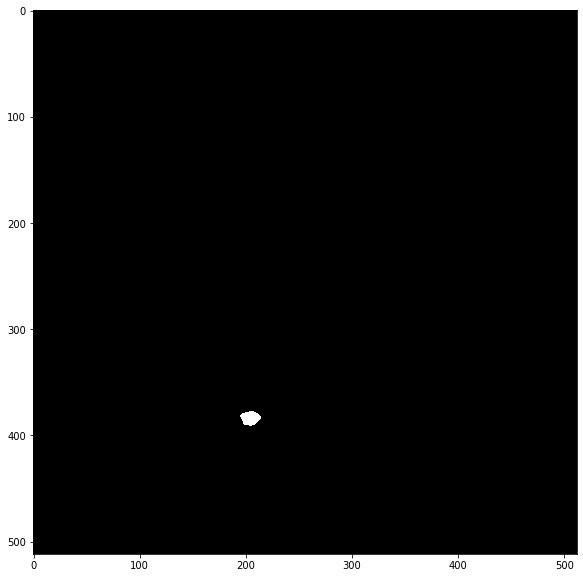

In [23]:
mask = daf.get_roi_mask(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n)

f, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask, interpolation='nearest', cmap='gray')

### From the file object, plane name, and roi name, get the activity trace for this roi
The raw fluorecence traces went through a series of processing: 1) demixed; 2) neuropil subtraction; 3) dF/F calculation; and 4) l0 event extraction. All these types of traces can be retrieved from the nwb file. 

**Please note all the traces were based from the raw movies not the denoised movies.**

#### Trace type:
 * `raw` : raw fluorecence trace
 * `neuropil` : raw neuropil trace, used for neuropil subtraction
 * `demixed` : demixed trace
 * `subtracted` : neuropil-subtracted trace
 * `dff` : dF/F trace
 * `events` : L0 event rate trace
 
The function returns both the trace and the timestamps in seconds of the trace.

Text(0, 0.5, 'dff')

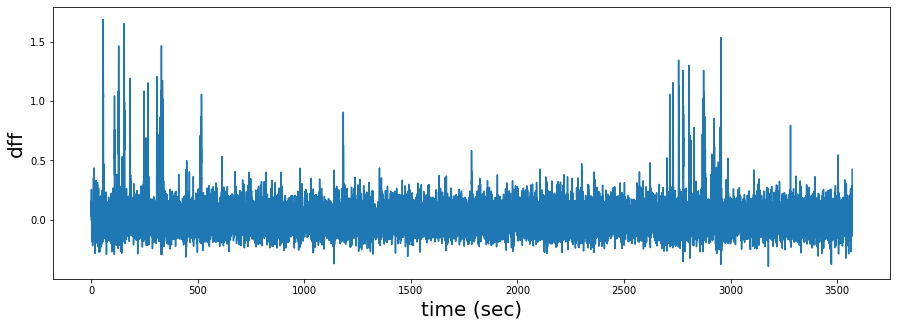

In [24]:
dff, ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='dff')

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(ts, dff)
ax.set_xlabel('time (sec)', fontsize=20)
ax.set_ylabel('dff', fontsize=20)

Text(0, 0.5, 'events')

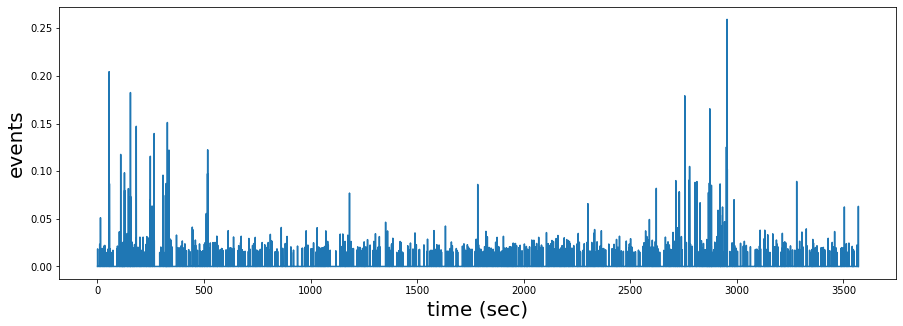

In [25]:
events, ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='events')

f, ax = plt.subplots(figsize=(15, 5))
ax.plot(ts, events)
ax.set_xlabel('time (sec)', fontsize=20)
ax.set_ylabel('events', fontsize=20)

### From the file object get the stimulus types
For the details about the visual stimuli presented during the imaging session, please refer to the [project white paper](https://github.com/AllenInstitute/v1dd_physiology/blob/main/v1dd_physiology/meta/V1DD_WhitePaper_v6.pdf).

In [26]:
stims = daf.get_stim_list(nwb_f=nwb_f)
stims

['drifting_gratings_full',
 'drifting_gratings_windowed',
 'locally_sparse_noise',
 'natural_images',
 'natural_images_12',
 'natural_movie',
 'spontaneous']

### From the file object, get the onset timestamps of each drifing grating condition
This function returns a dictionary with the key as each unique grating condition and the values as the onset timestamp of this particular grating condition (1d array). The key of grating condition is a 56-character string with under-score-separated condition parameters.
**dgc_parameters:**
 * `alt` : altitude of grating center in degrees, negative ventral, positive dorsal
 * `azi` : azimuth of grating center in degrees, negative nasal, positive temporal
 * `sf` : spatial frequency, cycle/degree
 * `tf` : temporal frequency, Hz
 * `dire` : direction, degree, 0 means temporal direction (on the right side of the animal) and increase counter-clockwise
 * `rad` : radius, degree
 
Note: zero 'sf' and 'tf' means blank condition (full-field mean brightness grey).

This function works for both windowed and full-field gratings.  
**dgc_type:**
 * `windowed` : for windowed gratings
 * `full` : for full-field gratings

In [27]:
dgc_onsets_wind = daf.get_dgc_onset_times(nwb_f=nwb_f, dgc_type='windowed')
list(dgc_onsets_wind.keys())

['alt-012.4_azi-008.9_sf0.00_tf00.0_dire000_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire000_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire030_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire060_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire090_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire120_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire150_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire180_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire210_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire240_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire270_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire300_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.04_tf01.0_dire330_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.08_tf01.0_dire000_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.08_tf01.0_dire030_con0.80_rad015',
 'alt-012.4_azi-008.9_sf0.08_tf01.0_dire060_con0.80_rad015',
 'alt-012.4_azi-008.9_sf

In [28]:
dgc_onsets_wind['alt-012.4_azi-008.9_sf0.00_tf00.0_dire000_con0.80_rad015']

array([ 350.88104,  482.99106,  491.99854,  606.09357,  609.09607,
       2414.5996 , 2519.687  , 2684.8245 ], dtype=float32)

### From the file object, get the onset timestamps of each locally sparse noise square
The returned dictionary have similar structure as drifting gratings.
**lsn parameters:**
 * `alt` : square center altitude, degree
 * `azi` : square center azimuth, degree
 * `sign` : '01' means white square, '-1' means black square

In [29]:
lsn_onsets = daf.get_lsn_onset_times(nwb_f=nwb_f)
print('first 20 locally sparse noise squares:')
list(lsn_onsets.keys())[0:20]

first 20 locally sparse noise squares:


['alt-004.7_azi-004.7_sign-1',
 'alt-004.7_azi-004.7_sign01',
 'alt-004.7_azi-014.0_sign-1',
 'alt-004.7_azi-014.0_sign01',
 'alt-004.7_azi-023.2_sign-1',
 'alt-004.7_azi-023.2_sign01',
 'alt-004.7_azi-032.6_sign-1',
 'alt-004.7_azi-032.6_sign01',
 'alt-004.7_azi-041.9_sign-1',
 'alt-004.7_azi-041.9_sign01',
 'alt-004.7_azi-051.2_sign-1',
 'alt-004.7_azi-051.2_sign01',
 'alt-004.7_azi-060.5_sign-1',
 'alt-004.7_azi-060.5_sign01',
 'alt-004.7_azi0004.7_sign-1',
 'alt-004.7_azi0004.7_sign01',
 'alt-004.7_azi0014.0_sign-1',
 'alt-004.7_azi0014.0_sign01',
 'alt-004.7_azi0023.2_sign-1',
 'alt-004.7_azi0023.2_sign01']

In [30]:
lsn_onsets['alt-004.7_azi-023.2_sign-1']

array([ 638.28705, 2065.9258 ,  649.3796 , 2077.0186 ,  663.3246 ,
       2090.9634 ,  682.6573 ,  692.4822 ,  700.72235,  720.68896,
        721.9567 ,  743.508  ,  756.81903,  770.4471 ,  781.22284,
        787.87823,  796.7523 ,  813.8666 ,  824.00836,  835.101  ,
        846.82733,  858.5538 , 1801.9227 , 1813.9661 , 1825.0586 ,
       1835.8342 , 1849.4623 , 1863.4072 , 1873.866  , 1880.5215 ,
       1899.2203 , 1904.2913 , 1925.8425 , 1931.5474 , 1943.9076 ,
       1961.3387 , 1969.8959 , 1982.5731 , 1993.0319 , 2003.8075 ,
       2016.8016 , 2028.2112 , 2037.7191 , 2057.0518 ], dtype=float32)